In [1]:
import json
from pyecharts import options as opts
from pyecharts.charts import Graph
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK 


with open(r'web.json', 'r',encoding='utf_8_sig') as f:
    data = json.load(f)

nodes = [
    {
        'name': node['name'],
        'symbolSize': 10,
        'category': node['category'],
    }
    for node in data['nodes']
]


links = [
    {
        'source': edge['source'],
        'target': edge['target'],
    }
    for edge in data['links']
]

categories = [
    {
        'name': category['name']
    }
    for category in data['categories']
]

G = Graph()
G.add(
    series_name='',
    nodes=nodes,
    links=links,
    categories=categories,
    #repulsion=30,
    label_opts=opts.LabelOpts(is_show=False),
    linestyle_opts=opts.LineStyleOpts(curve=0.2)
)
G.set_global_opts(
    title_opts=opts.TitleOpts(title='微博转发关系图'),
    legend_opts=opts.LegendOpts(is_show=False)
)
G.render_notebook()


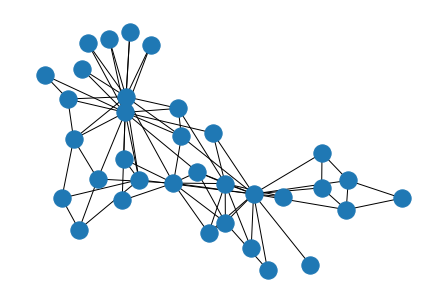

In [6]:
import networkx as nx                   #导入networkx包
import matplotlib.pyplot as plt     #导入绘图包matplotlib（需要安装，方法见第一篇笔记）
g = nx.karate_club_graph() # 美国空手道俱乐部
nx.draw(g) 
plt.show()   